<a href="https://colab.research.google.com/github/diazflorian/CryptoMatrix/blob/main/CryptoMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CryptoMatrix: análisis de las principales 50 cryptomonedas del 2015

**Objetivo**: Tratamiento de un conjunto de datos que tiene la información de las principales 50 criptomonedas en el mercado. Los datos han sido recopilados diariamente desde el 1 de enero de 2015.

**Datos de estudio**:
-	**Fecha**: Fecha de observación del precio 00:00:00 horas.
-	**Precio**: Precio por fecha y hora.
-	**Volumen de transacciones**: Cantidad de transacciones por día.
-	**Precio** (market_cap): Precio de las criptomonedas en el mercado con relación al USD.
-	**Nombre** de la moneda.

**Fuente**:
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko

**Actividades**:

-	Explorar los datos que utilizará en el proyecto para determinar el formato y los datos que necesitará para revisar el comportamiento de crecimiento y/o decrecimiento en determinado tiempo.
-	Cargar los datos en Pandas DataFrames, asegurándose de conectar el volumen de datos en comparación del valor o capitalización en dólares para el mercado, intentando analizar el comportamiento proporcional entre ambos.
-	Realizar un preprocesado de datos identificando los valores faltantes o nulos, su corrección, y el cambio del tipo de datos (astype); además con el comando str.upper() poner los index en mayúsculas, separar por grupos (usar comando groupby) dependiendo del valor de mercado en la fecha 1 de Enero de 2015 y organizarlos por valor ascendente.
-	Graficar en una sola figura y varios subplots el precio de las 4 criptomonedas más interesantes para usted en el año 2015.
-	Calcular la media de las criptomonedas para el año 2015 y seleccionar la desviación estándar menor entre ellas.
-	Determinar cuáles criptomonedas están por encima de la media.
-	En los últimos tres meses del año 2015, determine cuáles fueron las criptomonedas que tuvieron un mayor valor en el mercado.
-	Cuál fue la moneda más volátil; es decir, que moneda tuvo la mayor cantidad de fluctuaciones en el 2015.
-	Cuál fue la moneda más estable; es decir, que moneda tuvo mayor estabilidad en el 2015.


## Dependencias

In [ ]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt

## Carga de datos


In [ ]:
base_url = 'https://raw.githubusercontent.com/diazflorian/CryptoMatrix/main/crypto-datasets-coingecko/'

filenames = [
    'algorand.csv', 'apecoin.csv', 'avalanche-2.csv', 'axie-infinity.csv', 'binance-usd.csv', 'binancecoin.csv',
    'bitcoin-cash.csv', 'bitcoin.csv', 'cardano.csv', 'chain-2.csv', 'chainlink.csv', 'chiliz.csv', 'cosmos.csv',
    'crypto-com-chain.csv', 'dai.csv', 'decentraland.csv', 'dogecoin.csv', 'eos.csv', 'ethereum-classic.csv',
    'ethereum.csv', 'filecoin.csv', 'flow.csv', 'frax.csv', 'ftx-token.csv', 'hedera-hashgraph.csv',
    'internet-computer.csv', 'leo-token.csv', 'lido-dao.csv', 'litecoin.csv', 'matic-network.csv', 'monero.csv',
    'near.csv', 'okb.csv', 'polkadot.csv', 'quant-network.csv', 'ripple.csv', 'shiba-inu.csv', 'solana.csv',
    'staked-ether.csv', 'stellar.csv', 'terra-luna.csv', 'tether.csv', 'tezos.csv', 'the-sandbox.csv',
    'theta-token.csv', 'tron.csv', 'uniswap.csv', 'usd-coin.csv', 'vechain.csv', 'wrapped-bitcoin.csv'
]

dfs = []

for filename in filenames:
    url = base_url + filename
    df = pd.read_csv(url)
    coin_name = filename.split('.csv')[0]

    df['Volumen_MarketCap_Ratio'] = df['total_volume'] / df['market_cap']

    df = df.rename(columns={'date': 'Fecha', 'price': 'Precio', 'total_volume': 'Volumen', 'market_cap': 'Precio(market cap)', 'coin_name': 'Nombre'})
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df

,Fecha,Precio,Volumen,Precio(market cap),Nombre,Volumen_MarketCap_Ratio
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand,inf
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand,1.771106
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand,3.376409
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand,3.159393
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand,2.851563
...,...,...,...,...,...,...
98373,2024-03-14,72806.203294,3.743342e+08,1.134007e+10,wrapped-bitcoin,0.033010
98374,2024-03-15,71144.594917,5.042713e+08,1.107013e+10,wrapped-bitcoin,0.045552
98375,2024-03-16,69077.182160,6.277451e+08,1.074729e+10,wrapped-bitcoin,0.058410
98376,2024-03-17,65094.080626,3.505619e+08,1.014205e+10,wrapped-bitcoin,0.034565


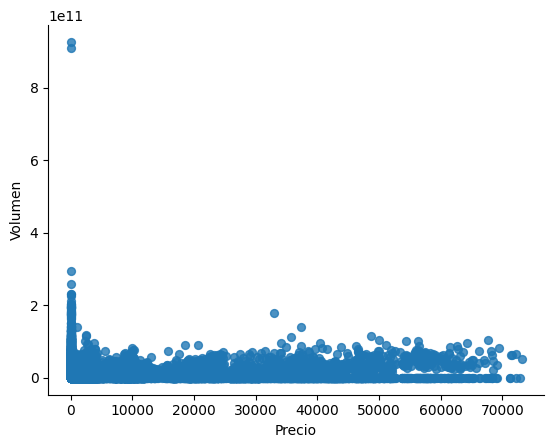

In [ ]:
merged_df.plot(kind='scatter', x='Precio', y='Volumen', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

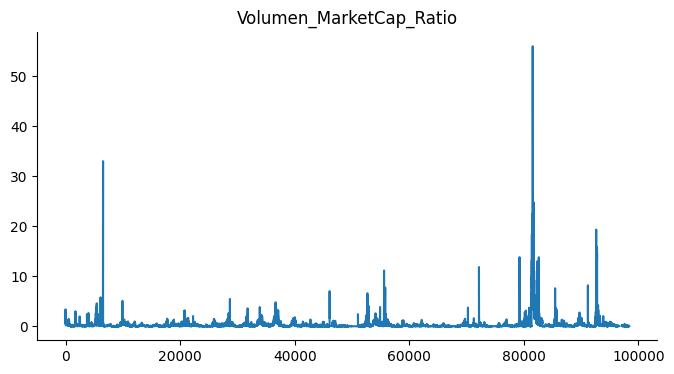

In [ ]:
merged_df['Volumen_MarketCap_Ratio'].plot(kind='line', figsize=(8, 4), title='Volumen_MarketCap_Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

## Preprocesamiento de datos

In [ ]:
merged_df = merged_df.fillna(0)
merged_df['Nombre'] = merged_df['Nombre'].str.upper()

# Separar por grupos dependiendo del valor de mercado en la fecha 1 de enero de 2015
merged_df['Fecha'] = pd.to_datetime(merged_df['Fecha'])
merged_df_2015 = merged_df[merged_df['Fecha'].dt.year == 2015]

# Organizar los datos
merged_df_2015 = merged_df_2015.sort_values(by='Precio(market cap)', ascending=True)

print(merged_df_2015)

           Fecha      Precio       Volumen  Precio(market cap)    Nombre  \
38165 2015-08-07    2.831620  9.062200e+04        0.000000e+00  ETHEREUM   
79919 2015-03-02    0.572521  2.000000e+00        1.440460e+05    TETHER   
79971 2015-04-27    1.000000  2.045000e+03        2.516000e+05    TETHER   
79970 2015-04-26    1.000000  8.200000e+01        2.516000e+05    TETHER   
79969 2015-04-25    1.000000  2.050000e+02        2.516000e+05    TETHER   
...          ...         ...           ...                 ...       ...   
11756 2015-12-17  456.473000  1.302614e+09        6.834976e+09   BITCOIN   
11764 2015-12-25  455.742000  1.058738e+09        6.838204e+09   BITCOIN   
11758 2015-12-19  462.053000  5.569411e+08        6.922224e+09   BITCOIN   
11757 2015-12-18  463.816000  1.135227e+09        6.946908e+09   BITCOIN   
11754 2015-12-15  464.999000  1.555252e+09        6.958908e+09   BITCOIN   

       Volumen_MarketCap_Ratio  
38165                      inf  
79919                

## Las 10 principales criptomonedas

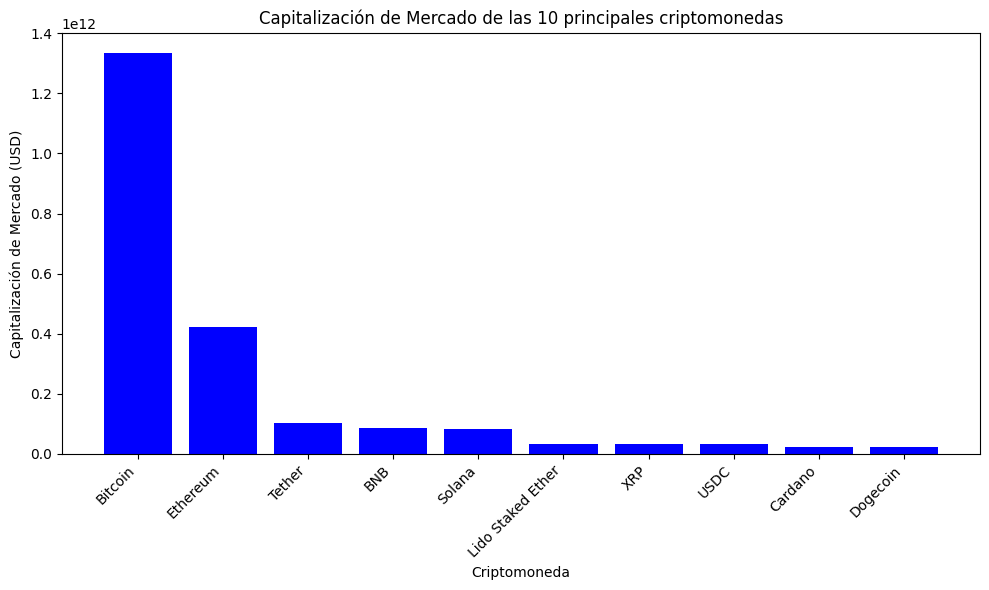


La criptomoneda más utilizada es Bitcoin con una capitalización de mercado de $1334560965016.00 USD.


In [ ]:
def obtener_datos():
    # Obtener datos de criptomonedas de CoinGecko
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    parametros = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': '10',
        'page': '1',
        'sparkline': 'false'
    }
    response = requests.get(url, params=parametros)
    if response.status_code == 200:
        datos = response.json()
        return datos
    else:
        print("Error al obtener los datos de la API")
        return None

def graficar(datos):
    nombres = []
    valores = []
    for cripto in datos:
        nombres.append(cripto['name'])
        valores.append(float(cripto['market_cap']))

    plt.figure(figsize=(10, 6))
    plt.bar(nombres, valores, color='blue')
    plt.xlabel('Criptomoneda')
    plt.ylabel('Capitalización de Mercado (USD)')
    plt.title('Capitalización de Mercado de las 10 principales criptomonedas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Mostrar el gráfico de la criptomoneda más utilizada
    max_valor = max(valores)
    max_indice = valores.index(max_valor)
    max_nombre = nombres[max_indice]

    print(f"\nLa criptomoneda más utilizada es {max_nombre} con una capitalización de mercado de ${max_valor:.2f} USD.")

def main():
    datos = obtener_datos()
    if datos:
        graficar(datos)
    else:
        print("No se pudieron obtener los datos.")

if __name__ == "__main__":
    main()


## Determinar cuáles criptomonedas están por encima de la media.

In [ ]:
def obtener_datos(base_url, filenames):
    dfs = []
    for filename in filenames:
        url = base_url + filename
        df = pd.read_csv(url)
        coin_name = filename.split('.csv')[0]

        df['Volumen_MarketCap_Ratio'] = df['total_volume'] / df['market_cap']

        df = df.rename(columns={'date': 'Fecha', 'price': 'Precio', 'total_volume': 'Volumen',
                                'market_cap': 'Precio(market cap)', 'coin_name': 'Nombre'})
        dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df = merged_df.fillna(0)
    merged_df['Nombre'] = merged_df['Nombre'].str.upper()
    merged_df['Fecha'] = pd.to_datetime(merged_df['Fecha'])

    return merged_df

def graficar_volumen_marketcap_ratio(dataframe):
    plt.figure(figsize=(12, 6))
    plt.bar(dataframe['Nombre'], dataframe['Volumen_MarketCap_Ratio'])
    plt.xticks(rotation=90)
    plt.xlabel('Criptomoneda')
    plt.ylabel('Volumen_MarketCap_Ratio')
    plt.title('Criptomonedas por encima de la media')
    plt.tight_layout()
    plt.show()

def Ejecu(base_url, filenames):
    merged_df = obtener_datos(base_url, filenames)

    # Graficar Volumen_MarketCap_Ratio
    graficar_volumen_marketcap_ratio(merged_df)


Ejecu(base_url, filenames)


## En los últimos tres meses del año 2015, determine cuáles fueron las criptomonedas que tuvieron un mayor valor en el mercado.




In [ ]:
def Analiti(base_url, filenames):
    def Ob_Media(base_url, filenames):
        dfs = []

        for filename in filenames:
            url = base_url + filename
            df = pd.read_csv(url)
            coin_name = filename.split('.csv')[0]

            df['Volumen_MarketCap_Ratio'] = df['total_volume'] / df['market_cap']

            df = df.rename(columns={'date': 'Fecha', 'price': 'Precio', 'total_volume': 'Volumen', 'market_cap': 'Precio(market cap)', 'coin_name': 'Nombre'})
            dfs.append(df)

        merged_df = pd.concat(dfs, ignore_index=True)

        merged_df = merged_df.fillna(0)
        merged_df['Nombre'] = merged_df['Nombre'].str.upper()

        # Separar por grupos dependiendo del valor de mercado en la fecha 1 de enero de 2015
        merged_df['Fecha'] = pd.to_datetime(merged_df['Fecha'])
        merged_df_2015 = merged_df[merged_df['Fecha'].dt.year == 2015]
        merged_df_2015 = merged_df_2015.sort_values(by='Precio(market cap)', ascending=True)

        return merged_df_2015

    def grafico(dataframe):
        plt.figure(figsize=(12, 6))
        plt.bar(dataframe['Nombre'], dataframe['Volumen_MarketCap_Ratio'])
        plt.xticks(rotation=90)
        plt.xlabel('Criptomonedas del mercado')
        plt.ylabel('Volumen_MarketCap_Ratio')
        plt.title('Criptomonedas con mayor valor en el mercado 2015')
        plt.tight_layout()
        plt.show()

    criptos_2015 = Ob_Media(base_url, filenames)

    grafico(criptos_2015)

Analiti(base_url, filenames)


## Moneda más volátil y estable

In [ ]:
def moneda_mas_volatil_2015(dataframe):
    df_2015 = dataframe[dataframe['Fecha'].dt.year == 2015]

    rangos = df_2015.groupby('Nombre')['Precio'].agg(lambda x: x.max() - x.min())
    moneda_volatil = rangos.idxmax()

    return moneda_volatil

def moneda_mas_estable_2015(dataframe):
    df_2015 = dataframe[dataframe['Fecha'].dt.year == 2015]

    desviaciones = df_2015.groupby('Nombre')['Precio'].std()
    moneda_estable = desviaciones.idxmin()

    return moneda_estable

# Calcular la criptomoneda más volátil en el año 2015
volatilidad_2015 = moneda_mas_volatil_2015(merged_df)
print("La criptomoneda más volátil en el año 2015 fue:", volatilidad_2015)

# Calcular la criptomoneda más estable en el año 2015
estabilidad_2015 = moneda_mas_estable_2015(merged_df)
print("La criptomoneda más estable en el año 2015 fue:", estabilidad_2015)